## Script for Comparing HSTS List to Other Local Files

This notebook uses the same logic as the previous one to process all the versions.  It has a simplified parse (with the original in comments), and methods to compare to Ivan's domains and Frank's organizations

### Upgrades for scale:  

#### ONLY 'domains-sorted.txt' has to replaced with the full ipv4 list      
    
No need to replace: 'domain-to-org.txt' - Frank doesn't have anything larger
HSTS-versions has to be uploaded to achtung
 

In [4]:
import urllib
import json
import re
import csv
import base64
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def url_reader(url):
    #open url
    f = urllib.urlopen(url)
    handle = f.read()
    f.close()
    
    #URLs used are format=text, so base64 decoding has to be done
    handle = base64.b64decode(handle)
    lines = handle.splitlines(True)
    
    #any comments will break the json reading library, these are the three types of spacings that occur
    fixed_json = ''.join(line for line in lines if not (line.startswith('//') or line.startswith('    //') or line.startswith('  //')))
    read_json = json.loads(fixed_json)
    return read_json

def parse(json_f):
    total = 0
    unique_entries = set()
    
    #specific to JSON format
    for entry in (json_f['entries']):
        total += 1
        if entry['name'].find("www") != -1:
            unique_entries.add(entry['name'][entry['name'].find('.'):])

        else:
             unique_entries.add(entry['name'])

       
    
        '''
        #find the last period from the right
        last_period = entry['name'].rfind(".") 
        if last_period == -1: #just for google
            ;#print entry['name']
        else:
            #extract text between 2nd to last period and last period (and account for case where that doesn't happen)
            second2last_period = entry['name'][:last_period].rfind(".")
            if second2last_period == -1:
                #print entry['name'][:last_period]
                unique_entries.add(entry['name'][:last_period])
            else:
                #print entry['name'][second2last_period+1:last_period]
                unique_entries.add(entry['name'][second2last_period+1:last_period])
        '''
    return unique_entries, total

## Local File Processing

In [38]:

#process data from Alexa top million, actually 800k provided by Ivan
with open('domains-sorted.txt', 'r') as topsites:
    original_data = csv.reader(topsites)
    hsts_search = dict()
    hkpk_search = dict()
    for item in original_data:
        last_period = item[1].rfind(".")
        #add in the commented part if you adjust parses
        hsts_search[item[1]] = int(item[2])  #[0:last_period])]
        hkpk_search[item[1]] = int(item[3]) #[0:last_period]


#this contains a list of Google's chromium versions
with open('hsts_versions.txt', 'r') as versions:
    v_list = versions.readlines()    
v_dict = dict()
for line in v_list:
    first_period = line.find(".")
    #this takes the first instance of a particular high-level version and saves it as the value for that key
    if (line[0:first_period] not in v_dict.keys()):
        v_dict[int(line[0:first_period])] = line.strip() #strip needed to remove \n at end
        

In [3]:
org_dict = {}

with open('domain-to-org.txt', 'r') as org:
    org_list = org.readlines()
    for line in org_list:
        line = line.split()
    
        org_dict[line[0]] = line[1]

inv_org = {}

#not used but could be for extracting entities that have overlap
for k,v in org_dict.iteritems():
    #try:
    if v in inv_org:
        inv_org[v].append(k)
    else:
        inv_org[v] = [k]

## Comparsion Functions.  Both depend on local files previously being read into dictionary

In [39]:
def compare_crawl_zmap(url_set):
    count_found = 0
    hsts_used = 0 
    hkpk_used = 0
    names = []
    for entry in url_set:
        if hsts_search.has_key(entry):
            count_found +=1
            hsts_used+=hsts_search[entry]
            hkpk_used+=hkpk_search[entry]
            if hkpk_search[entry] == 1:
                names.append(str(entry))
    return count_found, hsts_used, hkpk_used, names

def compare_org(url_set):
    site_set = set()
    total_found = 0
    print org_dict.keys()
    for entry in url_set:
        if org_dict.has_key(entry):
            total_found += 1
            site_set.add(org_dict[entry])

    print len(site_set)
    print total_found

In [40]:
for key in sorted(list(v_dict.keys()))[-1:]:

    #specific format for this url
    #Alternate url for current version: "https://cs.chromium.org/codesearch/f/chromium/src/net/http/transport_security_state_static.json"
    temp_url = "https://chromium.googlesource.com/chromium/src/+/" + v_dict[key] + "/net/http/transport_security_state_static.json?format=text"  
    #run custom functions above
    processed_json =  url_reader(temp_url)
    json_set, total = parse(processed_json)
    #compare_org(json_set)
    
    count1, count2, count3, names = compare_crawl_zmap(json_set)
    print count1, count2, count3
    print (names)
    #save for plotting
    #x_axis.append(key)
 

2669 2146 97
['click-licht.de', 'myownconference.com', 'obsproject.com', 'manesht.ir', 'pcloud.com', 'thekingofhate.com', 'otya.me', 'muabannhanh.com', 'megaplan.ru', 'espci.fr', 'frillip.com', 'ges-bo.de', 'stat.ink', 'vieclam24h.vn', 'dnscrypt.org', 'privacyinternational.org', 'libsodium.org', 'myownconference.ru', 'thecustomizewindows.com', 'm2epro.com', 'github.com', 'cdnjs.com', 'philadelphia.com.mx', 'factuursturen.nl', 'themonthly.com.au', 'deltava.org', 'flagspot.net', 'ripple.com', 'atraining.ru', 'securityheaders.io', 'umisonoda.com', 'rootforum.org', 'lovelivewiki.com', 'megaxchange.com', 'grokker.com', 'linux.cn', 'troi.de', 'obscuredfiles.com', 'ikwilthepiratebay.org', 'fresh.co.il', 'billogram.com', 'peterdavehello.org', 'unrealircd.org', 'gyas.nl', 'imququ.com', 'myownconference.pl', 'ich-tanke.de', 'slo-tech.com', 'server-essentials.com', 'lovizaim.ru', 'edyou.eu', 'posteo.de', 'hicoria.com', 'mobileread.com', 'imjad.cn', 'nostraforma.com', 'unila.edu.br', 'treinaweb.co

## Plotting

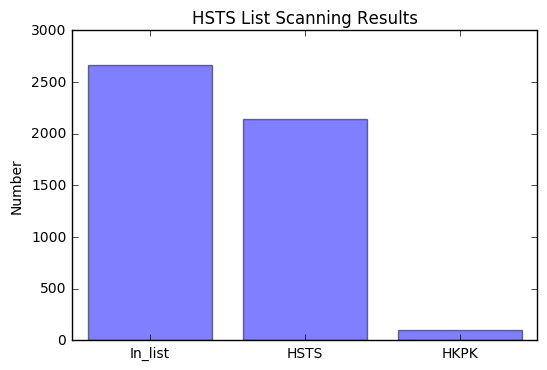

In [3]:
objects = ('In_list', 'HSTS', 'HKPK')
y_pos = np.arange(len(objects))
y = [2669, 2146, 97]


plt.bar(y_pos, y, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title('HSTS List Scanning Results')


plt.show()